<a href="https://colab.research.google.com/github/YayanDirjas/Tugas_DeepLearning/blob/main/legenda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!kaggle datasets download yayandirjasakti/legenda-pemain-barcelona
!mkdir dataset
!unzip /content/legenda-pemain-barcelona.zip -d /content/dataset

legenda-pemain-barcelona.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘dataset’: File exists
Archive:  /content/legenda-pemain-barcelona.zip
  inflating: /content/dataset/Legenda pemain barcelona/andreas_iniesta/01e389b191.jpg  
  inflating: /content/dataset/Legenda pemain barcelona/andreas_iniesta/01f4b17393.jpg  
  inflating: /content/dataset/Legenda pemain barcelona/andreas_iniesta/021b7f5cc4.jpg  
  inflating: /content/dataset/Legenda pemain barcelona/andreas_iniesta/0336f47d38.jpg  
  inflating: /content/dataset/Legenda pemain barcelona/andreas_iniesta/035edf127f.jpg  
  inflating: /content/dataset/Legenda pemain barcelona/andreas_iniesta/04c99ef19d.jpg  
  inflating: /content/dataset/Legenda pemain barcelona/andreas_iniesta/04fa5ab120.jpg  
  inflating: /content/dataset/Legenda pemain barcelona/andreas_iniesta/054ddaa57b.jpg  
  inflating: /content/dataset/Legenda pemain barcelona/andreas_iniesta/07485babdb.

In [5]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [6]:

dataset_path = Path(r'/content/dataset')
file_path = list(dataset_path.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [7]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)
df = pd.concat([file_path, labels], axis=1)
df.columns = ['image', 'label']
df.head()
     

,image,label
0,/content/dataset/Legenda pemain barcelona/lion...,lionel_messi
1,/content/dataset/Legenda pemain barcelona/lion...,lionel_messi
2,/content/dataset/Legenda pemain barcelona/lion...,lionel_messi
3,/content/dataset/Legenda pemain barcelona/lion...,lionel_messi
4,/content/dataset/Legenda pemain barcelona/lion...,lionel_messi


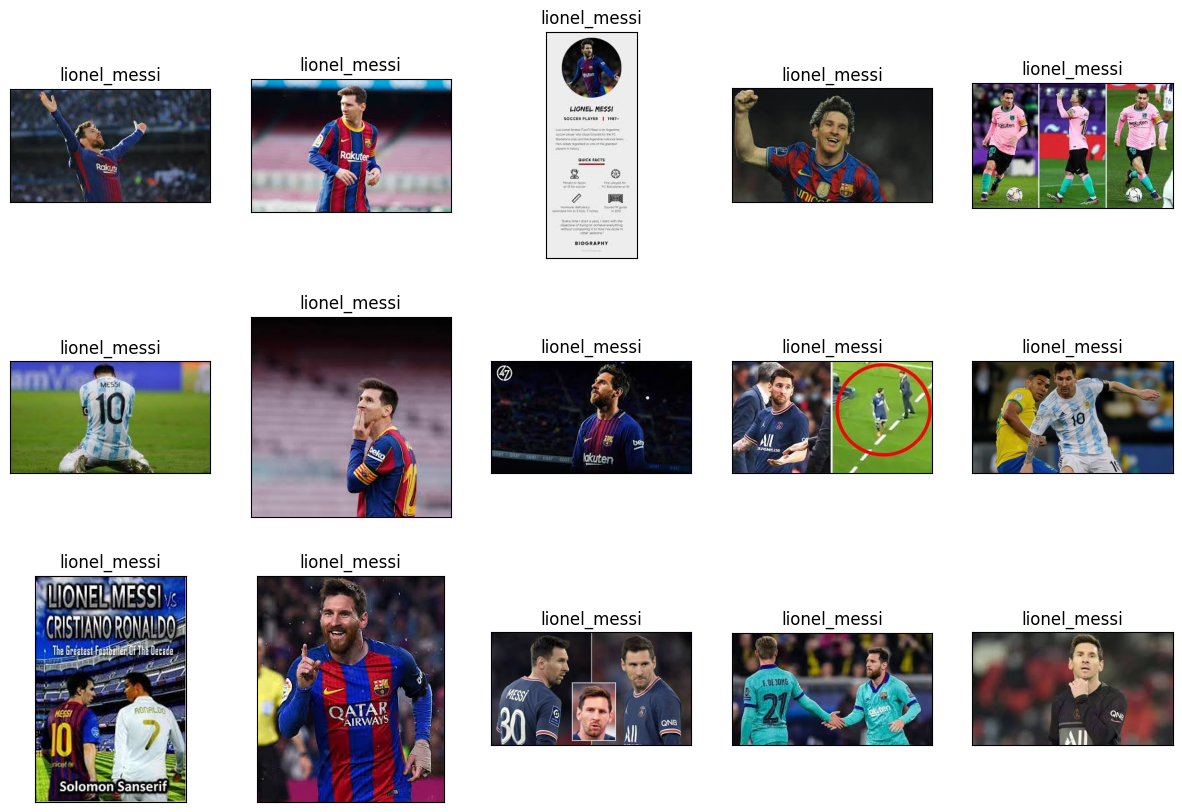

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.show()

In [9]:
df.label.value_counts()

andreas_iniesta    333
lionel_messi       332
ronaldinho         321
Name: label, dtype: int64

In [10]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

andreas_iniesta    333
lionel_messi       332
ronaldinho         321
Name: label, dtype: int64

In [11]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [12]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)
     

Shape of training data (552, 2)
Shape of test data (296, 2)
Shape of validation data (138, 2)


In [13]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)
     

Found 552 validated image filenames belonging to 3 classes.
Found 296 validated image filenames belonging to 3 classes.
Found 138 validated image filenames belonging to 3 classes.


In [14]:
input_shape = (200, 200, 3)

In [15]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [33]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(train, batch_size= 512, validation_data=val, epochs=100)

Epoch 1/100
18/18 [==============================] - 13s 573ms/step - loss: 0.3957 - accuracy: 0.8478 - val_loss: 1.4357 - val_accuracy: 0.6087
Epoch 2/100
18/18 [==============================] - 10s 584ms/step - loss: 0.4007 - accuracy: 0.8261 - val_loss: 1.2051 - val_accuracy: 0.6304
Epoch 3/100
18/18 [==============================] - 11s 628ms/step - loss: 0.3386 - accuracy: 0.8659 - val_loss: 1.1603 - val_accuracy: 0.6739
Epoch 4/100
18/18 [==============================] - 11s 584ms/step - loss: 0.3622 - accuracy: 0.8496 - val_loss: 1.1048 - val_accuracy: 0.6594
Epoch 5/100
18/18 [==============================] - 10s 589ms/step - loss: 0.3442 - accuracy: 0.8678 - val_loss: 0.9465 - val_accuracy: 0.6667
Epoch 6/100
18/18 [==============================] - 10s 582ms/step - loss: 0.3202 - accuracy: 0.8732 - val_loss: 1.2357 - val_accuracy: 0.6232
Epoch 7/100
18/18 [==============================] - 10s 535ms/step - loss: 0.2808 - accuracy: 0.8750 - val_loss: 1.2628 - val_accuracy:

In [34]:

model.save('model-1.h5')

In [35]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

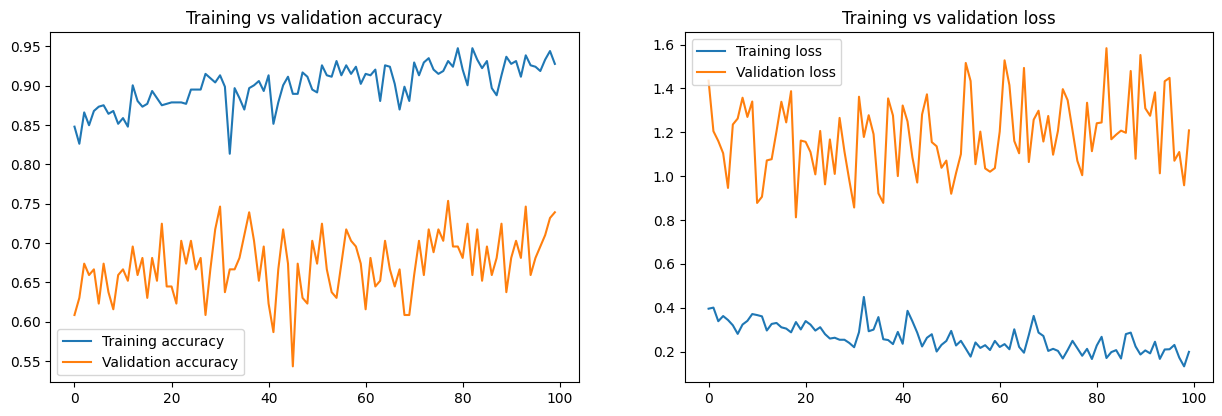

In [36]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")
plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")
plt.show()

In [37]:
pred = model.predict(test)

10/10 [==============================] - 5s 466ms/step


In [38]:

pred = np.argmax(pred, axis=1)

In [39]:
labels = train.class_indices

In [40]:
labels

{'andreas_iniesta': 0, 'lionel_messi': 1, 'ronaldinho': 2}

In [45]:
labels = dict((v,k) for k, v in labels.items())

In [46]:
y_pred = [labels[k] for k in pred]

In [47]:
print(classification_report(x_test.label, y_pred))

                 precision    recall  f1-score   support

andreas_iniesta       0.83      0.73      0.78        96
   lionel_messi       0.64      0.80      0.71        96
     ronaldinho       0.84      0.73      0.78       104

       accuracy                           0.75       296
      macro avg       0.77      0.75      0.76       296
   weighted avg       0.77      0.75      0.76       296



In [48]:
print(confusion_matrix(x_test.label, y_pred))

[[70 23  3]
 [ 7 77 12]
 [ 7 21 76]]
